# Handwriting Extraction


## Group members
- Monika Adamczewska C17313136
- James Behan C17348016
- Conor Rogers C16347693


# Description 
- The purpose of this project is to extract and enhance text from images of handwriting on pages.   
- The user is prompted to choose an image that will be used to extract the handwritten text.   
- The image is loaded and the program will check if it has loaded correctly   
    - If it has not loaded correctly an error is displayed to the user  
    - If it has loaded correctly the program will continue with the code  
- A copy of the original image is stored - this will be used later to display the original image to the user   
- The image is converted to Grayscale and any streaks of bright light are removed. A mask is created this way   
- This mask is then inverted.  
- A new image is created by combining the Grayscale image and the inverted mask.  
- This new image is then inverted.   
- A check is put in place to make sure that the inverted image (which will serve as a mask) returns a result[1]  
    - If all of the pixels in the inverted image are black an error is displayed to the user. This implies that the program could not find any handwritten text in the image   
    - Otherwise the program will continue with the code  
- Morphology is then applied to the inverted image - this allows the program to extract a more precise region of interest  
- Thresholding and Morphology are used to filter out both the horizontal and the vertical lines from the page.[2]  
- A new mask is created and inverted - then used to remove the lines from the image so that a new Region of Interest is created.  
- Thresholding and Morphology are applied to this new Region of Interest to filter out the handwritten text as efficiently as possible.   
- A blank white image is then created[3]. This will be used as a background for the extracted handwritten text.   
- The blank image and the original image are then combined.   
- This combined image is converted to the HSV colourspace and the Volume channel is extracted.   
- The program then iterates through the Volume channel and darkens areas of the image to enhance the handwritten text.[4]  
- The enhanced image is stored and converted into the BGR colour space to allow for combining with the image of text on the white background.   
- These images are then combined to create a final image.   
- The original and final images are displayed to the user.  


# Method
1. Load the image
2. Check if image has loaded correctly
    * If not loaded correctly - display an error
    * If loaded correctly - continue with the code
3. Create a copy of the image
4. Convert the image to grayscale
5. Remove any streaks of bright light by applying morphology - this creates a mask
6. Invert the mask
7. Create a new image by combining the grayscale image and the inverted mask
8. Invert this new image
9. Check if the inverted image contains any parts of the original image
    * If all of the pixels in the inverted image are black - display an error
    * If there are pixels in the inverted image that are not black - continue with code
10. Apply morphology to the inverted image to acquire a more precise region of interest
11. Use thresholding and morphology to filter out the horizontal lines from the page
12. Use thresholding and morphology to filter out the vertical lines from the page
13. Combine the acquired line masks into one 
14. Invert the line mask
15. Remove the lines from the original mask so that they do not interfere with the handwritten text - this creates a region of interest for inspection
16. Apply thresholding and morphology to this region of interest to filter out the text from the image
17. Create a blank white image - this will be used to as background of the filtered handwritten text
18. Combine the blank image with the original image by using the numpy where function
19. Convert this combined image to the HSV colourspace
20. Extract the Value channel by splitting the HSV image
21. Iterate through all of the pixels in the Value channel image
    * If the pixel is not white, darken it by 100 and store in a new enhanced image
22. Convert the new enhanced image to BGR to allow for combining it with the image that has the text on a white background
23. Create a final image by combining the enhanced image with the image of the text on white background
24. Display the original and the final images to the user 


# Testing
The code was tested using various different images of handwriting.    
Images of text written in blue pen as well as black pen were tested.
Images with different lighting conditions were tested.

Alternative methods were also considered when designing the solution. Canny Edge Detection[5] as well as Sobel Edge Detection[6] proved to be less beneficial than the traditional methods of Thresholding and Morphology.

# Conclusion 
Using methods mentioned in the outline above (thresholding, accessing individual channels within colour spaces[7], morphology) proved beneficial and was able to provide satisfying, though not ideal results.
The main issue was not being able to extract all of the lines and edges from the image completely. Small parts of the lines from the copy are still visible on the final output image.

# References

```
[1]V. Valente, "How to detect a full black color image in OpenCV Python?", Stack Overflow, 2020. [Online]. 
Available: https://stackoverflow.com/questions/41406547/how-to-detect-a-full-black-color-image-in-opencv-python/41414865. 
```
```
[2]M. Maisonneuve, "How to get the cells of a sudoku grid with OpenCV?", Stack Overflow, 2020. [Online]. 
Available: https://stackoverflow.com/questions/59182827/how-to-get-the-cells-of-a-sudoku-grid-with-opencv.
```
```
[3]Y. Yazıcıoğlu, "Is it possible to paste an image on top of another in OpenCV?", Stack Overflow, 2020. [Online]. 
Available: https://stackoverflow.com/questions/60937583/is-it-possible-to-paste-an-image-on-top-of-another-in-opencv.
```
```
[4]"Image Enhancement Techniques using OpenCV and Python", Medium, 2020. [Online]. 
Available: https://towardsdatascience.com/image-enhancement-techniques-using-opencv-and-python-9191d5c30d45.
```
```
[5]"OpenCV: Canny Edge Detection", Docs.opencv.org, 2020. [Online]. 
Available: https://docs.opencv.org/master/da/d22/tutorial_py_canny.html.
```
```
[6]"OpenCV: Sobel Derivatives", Docs.opencv.org, 2020. [Online]. Available: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html.
```
```
[7]"Color spaces in OpenCV (C++ / Python)", Learnopencv.com, 2020. [Online]. 
Available: https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/. 
```

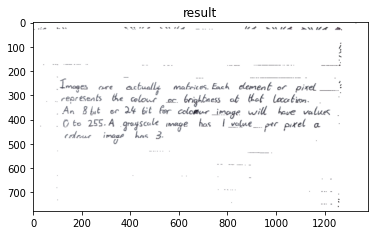

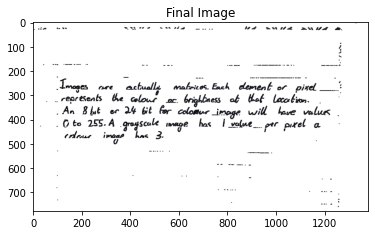

In [1]:
import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui

f = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])
I = cv2.imread(f)

# Error checking to see if the image was loaded correctly
if I is None:
    print('Invalid input')
    sys.exit(0)
else:
    Original = I.copy()
    #Converting the image to grayscale and removing any bright light streaks 
    Gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
    closed = cv2.morphologyEx(Gray,cv2.MORPH_CLOSE, shape, iterations=2)
    inverted_mask = cv2.bitwise_not(closed)
    new_image = Gray + inverted_mask

    inverted_image = cv2.bitwise_not(new_image)

    #Checking if the mask has returned any part of the image.
    #If no text was found, an error message is displayed
    if cv2.countNonZero(inverted_image) == 0:
        print ("Could not find handwritten text in image")
        sys.exit(0)
    else:
        #Applying morphology to the mask
        shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,8))
        new_mask = cv2.morphologyEx(inverted_image, cv2.MORPH_CLOSE,shape)   
        
        #Using thresholding and morphology to filter out the horizontal lines
        T,horizontal_lines = cv2.threshold(new_mask,thresh=10,maxval=255,type = cv2.THRESH_BINARY)
        shape = cv2.getStructuringElement(cv2.MORPH_RECT,(160,1))
        horizontal_lines = cv2.morphologyEx(horizontal_lines, cv2.MORPH_OPEN,shape)
        
        #Using thresholding and morphology to filter out the vertical lines
        T,vertical_lines = cv2.threshold(new_mask,thresh=10,maxval=255,type = cv2.THRESH_BINARY)
        shape = cv2.getStructuringElement(cv2.MORPH_RECT,(1,160))
        vertical_lines = cv2.morphologyEx(vertical_lines, cv2.MORPH_OPEN,shape)
        
        #Creating a combined mask for the vertical and horizontal lines
        Lines = vertical_lines + horizontal_lines
        Inverted_Lines = cv2.bitwise_not(Lines)
        
        #Removing the lines from the original mask to get a more accurate mask of the handwritten text
        ROI = cv2.bitwise_and(inverted_image, inverted_image, mask = Inverted_Lines)

        #Applying thresholding and morphology to filter out the text from the image
        T,Text = cv2.threshold(ROI, thresh = 50, maxval = 255, type = cv2.THRESH_BINARY)
        shape = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
        Text = cv2.dilate(Text,shape, iterations = 2)
        Text = cv2.cvtColor(Text, cv2.COLOR_GRAY2BGR)

        #Creating a blank white image for the background
        white = np.full_like(I, (255,255,255))

        #Applying a mask to the original image and the blank white image
        textOnWhite = np.where(Text!=0, I, white)

        #Converting the result image to HSV
        HSV = cv2.cvtColor(textOnWhite,cv2.COLOR_BGR2HSV)
        h,s,v = cv2.split(HSV)

        #Enhancing the output image
        for y in range(v.shape[0]):
            for x in range(v.shape[1]):
                if all(v[y,x] != [255,255,255]):
                    v[y][x] = v[y][x] - 100
                    enhancedImage = v
        enhancedImage = cv2.cvtColor(enhancedImage, cv2.COLOR_GRAY2BGR)
        
        #Creating the final enhanced image
        FinalImage = cv2.bitwise_and(enhancedImage,textOnWhite)
        
        #Displayig the original and the processed images to the user
        plt.title("Original")
        plt.imshow(Original)
        plt.show()
        
        plt.title("Final Image")
        plt.imshow(FinalImage,cmap="gray")
        plt.show()